# Imports

In [1]:
import tensorflow as tf
import os

## limit memory growth


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [6]:
os.listdir(data_dir)

['happy', '.DS_Store', 'sad']

In [7]:
os.listdir(data_dir)

['happy', '.DS_Store', 'sad']

In [8]:
for image_class in os.listdir(data_dir):
    image_class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(image_class_path):  
        for image in os.listdir(image_class_path):
            image_path = os.path.join(image_class_path, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print("image not extension")
                    os.remove(image_path)
            except Exception as e:
                print("issue w/ image:", e)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 168 files belonging to 2 classes.


In [23]:
data_iterator = data.as_numpy_iterator()

In [24]:
batch = data_iterator.next()

In [25]:
# 1 = sad, 0 = sad
batch[0].max()

255.0

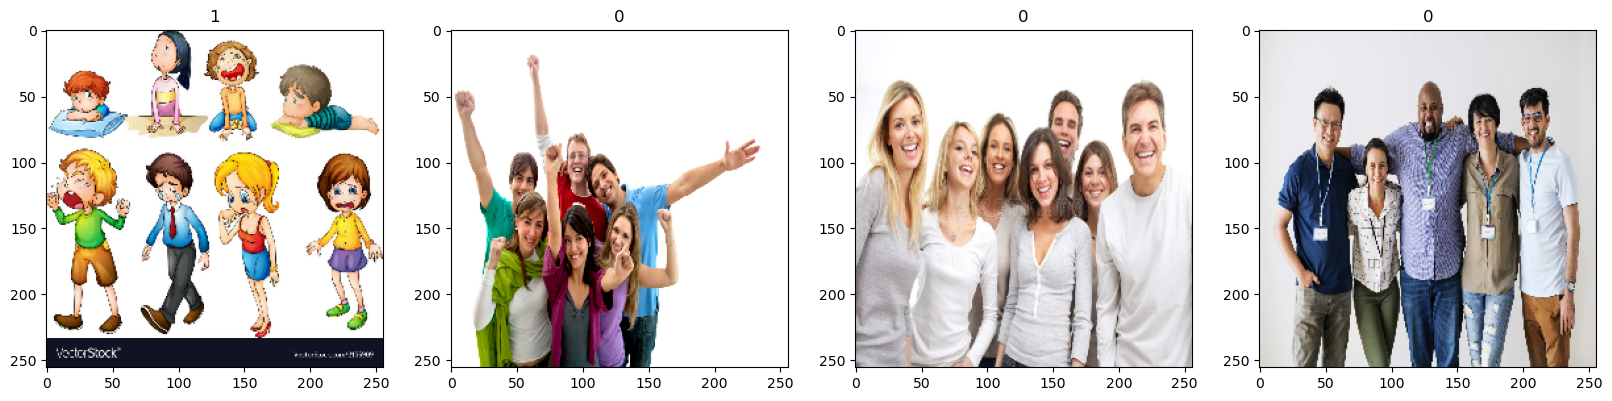

In [35]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Preprocess Data

In [28]:
data = data.map(lambda x,y: (x/255, y))

In [40]:
data.as_numpy_iterator().next()[0].max()

1.0

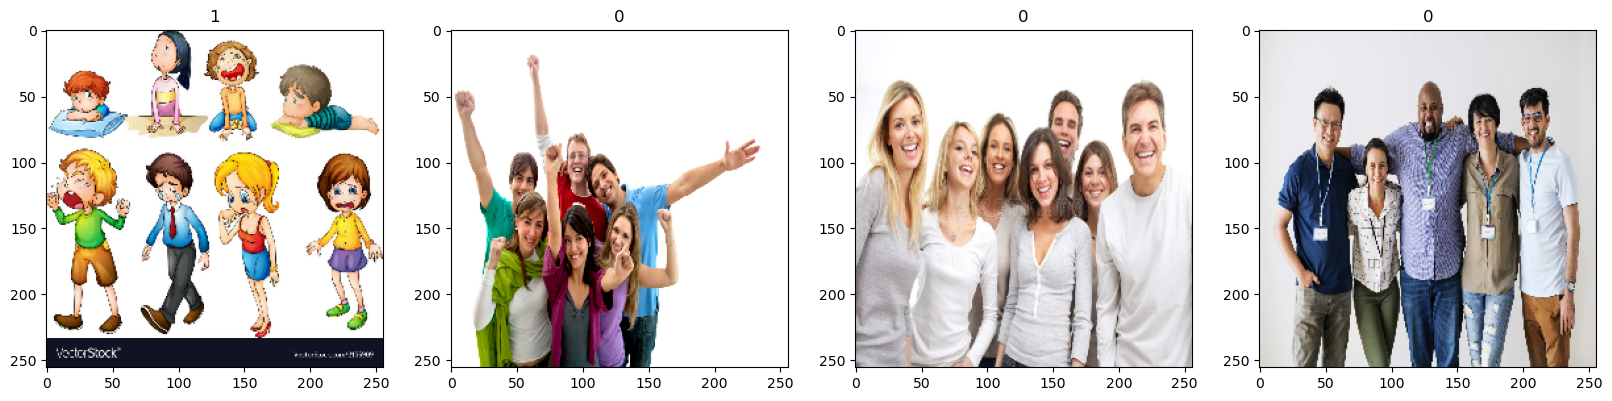

In [41]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Split Data

In [42]:
len(data)

6

In [43]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [44]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## DEEP LEARNING MODEL

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [46]:
model = Sequential()

In [47]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [48]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [51]:
logdir = 'logs'

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [53]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 2s 306ms/step - loss: 0.6346 - accuracy: 0.6719 - val_loss: 0.5757 - val_accuracy: 0.6875
Epoch 2/20
4/4 [==============================] - 2s 304ms/step - loss: 0.6038 - accuracy: 0.6797 - val_loss: 0.5700 - val_accuracy: 0.6562
Epoch 3/20
4/4 [==============================] - 2s 311ms/step - loss: 0.5310 - accuracy: 0.7344 - val_loss: 0.4759 - val_accuracy: 0.8438
Epoch 4/20
4/4 [==============================] - 2s 309ms/step - loss: 0.5116 - accuracy: 0.7969 - val_loss: 0.6117 - val_accuracy: 0.6562
Epoch 5/20
4/4 [==============================] - 2s 308ms/step - loss: 0.4915 - accuracy: 0.7656 - val_loss: 0.2787 - val_accuracy: 0.9688
Epoch 6/20
4/4 [==============================] - 2s 301ms/step - loss: 0.3417 - accuracy: 0.8672 - val_loss: 0.3865 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 2s 305ms/step - loss: 0.2911 - accuracy: 0.8828 - val_loss: 0.2977 - val_accuracy: 0.8438
Epoch 8/20
4/4 [====

In [55]:
hist.history

{'loss': [0.6345845460891724,
  0.6037864089012146,
  0.5309789180755615,
  0.5116018056869507,
  0.491462379693985,
  0.34172216057777405,
  0.2911461293697357,
  0.24683257937431335,
  0.1995457261800766,
  0.1756586730480194,
  0.0857703685760498,
  0.0705113559961319,
  0.08227649331092834,
  0.07202108949422836,
  0.07138033211231232,
  0.04844977334141731,
  0.030694160610437393,
  0.019815919920802116,
  0.016740215942263603,
  0.013992846012115479],
 'accuracy': [0.671875,
  0.6796875,
  0.734375,
  0.796875,
  0.765625,
  0.8671875,
  0.8828125,
  0.9453125,
  0.9453125,
  0.9765625,
  1.0,
  0.9921875,
  0.9921875,
  0.96875,
  0.9765625,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.5756615400314331,
  0.5700461864471436,
  0.47587525844573975,
  0.6117095351219177,
  0.27868175506591797,
  0.3865002691745758,
  0.2977486252784729,
  0.24678274989128113,
  0.14214205741882324,
  0.11395544558763504,
  0.09093331545591354,
  0.05639917030930519,
  0.02017010748386383,
 